In [0]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [0]:
import tensorflow as tf
from tensorflow import keras

In [6]:
keras.__version__
tf.__version__

'2.2.0'

In [7]:
fashion_mnist = keras.datasets.fashion_mnist                                      #Storing fashion_mnist data into fashion_mnist object 
(X_train_full,y_train_full),(X_test,y_test)=fashion_mnist.load_data()             #X_train_full and y_train_full represent our entire databases   [60000]
                                                                                  #X_test and y_test are the test datasets  [10000]

4423680/4422102 [==============================] - 0s 0us/step


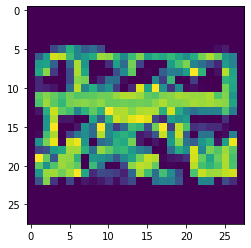

In [8]:
plt.imshow(X_train_full[10000])                                                   #Plotting 10000th image from the dataset. 

In [9]:
y_train_full[10000]                                                               #Represents the class 10000th image belongs to.

8

In [0]:
class_names = ["T-shirt/Top","Trouser","Pull-Over","Dress","Coat",
               "Sandal","Shirt","Sneaker","Bag","Ankle Boot"]                     #Class name list created so that we can find the name of the class

In [11]:
class_names[y_train_full[10000]]                                                  #The 10000th image represents a bag (Class number 8)

'Bag'

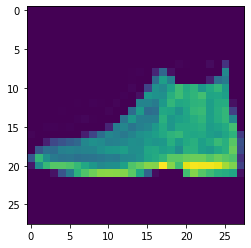

In [12]:
plt.imshow(X_test[0])

In [93]:
print(y_test[0])
class_names[y_test[0]]                                                            #Printing the name of the class instead of class number

9


'Ankle Boot'

In [0]:
#Since we would be using Gradient Descent to compile our model we need to normalize the pixel intensities
#Normalization implies restricting the values between 0 and 1
X_train_n = X_train_full /255.                                                    #Normalized data. Normalization is done so that each image is approx.
X_test_n = X_test/255.                                                            #of the same scale. 'n' represents normalized data.

In [0]:
#We are dividing the dataset into three categories. 
#Training Set : 5000 : Used for training model 
#Validation Set: 55000 : Used for tuning the hyperparameters and to evaluate the model
#Testing Set : 10000 : Used to test the model after the model has gone through initial vetting by the validation set

X_valid,X_train = X_train_n[:5000],X_train_n[5000:]
y_valid,y_train = y_train_full[:5000],y_train_full[5000:]
X_test = X_test_n

In [46]:
X_valid[2]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.08627451,
        0.4627451 , 0.09411765, 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.18823529, 0.34509804, 0.01960784,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.04705882, 0.39215686,
        0.83137255, 0.80392157, 0.7254902 , 0.70196078, 0.67843137,
        0.72941176, 0.75686275, 0.86666667, 0.55686275, 0.33333333,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.33333333,
        0.29803922, 0.78039216, 0.88235294, 0.97254902, 1.        ,
        0.93333333, 0.8862

In [0]:
#Sequential model API : Simple Neural Network
#Functional Model API : Complex Neural Network structures

In [0]:
np.random.seed(20)                                                                #Random seed ---> 20 use to get the same accuracy each time.
tf.random.set_seed(20)                                                            #Random seed is used to replicate the same result everytime.

In [0]:
#Relu gives output as 0 for all the negative values and for the positive values it equals to the input itself
#Softmax is used because we have 10 different categories. Softmax looks after giving the output of all the values i.e. the probabilities of every
#value to be equal to 1 (sum of all the values)

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28,28]))
model.add(keras.layers.Dense(300,activation="relu"))
model.add(keras.layers.Dense(100,activation="relu"))
model.add(keras.layers.Dense(10 ,activation="softmax"))

In [35]:
#None --> As we have input the entire data
#Rest are the parameters and the weights associated
model.summary()                                                                   

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_4 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_5 (Dense)              (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


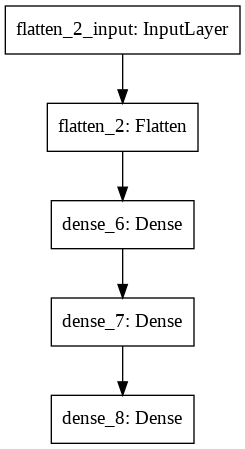

In [48]:
#This is the diagrammatic representation of our multilayer perceptron model
import pydot
keras.utils.plot_model(model)

In [0]:
#We can get the actual weights assigned to each of the branches by this.
weight,biases = model.layers[1].get_weights()

In [50]:
weight

array([[-0.02938781, -0.04205418,  0.07390541, ..., -0.0685249 ,
        -0.04619354,  0.00190804],
       [ 0.00267556, -0.06751891,  0.02674331, ...,  0.05128676,
        -0.05161192,  0.04931911],
       [-0.00386088,  0.03919017,  0.00135611, ...,  0.01852165,
        -0.07047849,  0.00704562],
       ...,
       [ 0.03970003, -0.02303269,  0.07254928, ..., -0.06745046,
        -0.02646004, -0.03937887],
       [-0.01360295, -0.03819128,  0.03968257, ..., -0.02708748,
         0.01267441, -0.02087217],
       [ 0.06085299, -0.00346507, -0.03811606, ..., -0.04614221,
         0.03967873, -0.04782342]], dtype=float32)

In [51]:
weight.shape

(784, 300)

In [52]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [53]:
biases.shape

(300,)

In [0]:
#Till now we have generated our multilayer perceptron model.
#sparse_categorical_crossentropy is used because we have labels - class names like tshirt boot etc
#Would have used categorical_crossentropy if we had probabilities
#Compiling our model
#Optimizer is sgd i.e. stotcastic gradient descent basically back propogation method
model.compile(loss = "sparse_categorical_crossentropy",
              optimizer = "sgd", 
              metrics=["accuracy"])

In [94]:
#Fitting the model 
model_history = model.fit(X_train,y_train,epochs=30,
                          validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0020 - accuracy: 1.0000 - val_loss: 0.5984 - val_accuracy: 0.8952
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.5995 - val_accuracy: 0.8956
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6023 - val_accuracy: 0.8956
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0019 - accuracy: 1.0000 - val_loss: 0.6018 - val_accuracy: 0.8970
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.0018 - accuracy: 1.0000 - val_loss: 0.6048 - val_accuracy: 0.8954
Epoch 6/30
 965/1719 [===============>..............] - ETA: 1s - loss: 0.0017 - accuracy: 1.0000

KeyboardInterrupt: ignored

In [75]:
model_history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

In [76]:
model_history.history

{'accuracy': [0.9998000264167786,
  0.9998727440834045,
  0.9987272620201111,
  0.999963641166687,
  0.999890923500061,
  0.9999454617500305,
  0.999963641166687,
  0.999854564666748,
  0.9999454617500305,
  0.9998727440834045,
  0.9998363852500916,
  1.0,
  0.9999818205833435,
  0.999963641166687,
  1.0,
  0.9997818470001221,
  0.9999454617500305,
  0.9999454617500305,
  1.0,
  0.999927282333374,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  1.0,
  0.9999818205833435,
  0.9999818205833435,
  0.9999454617500305,
  1.0],
 'loss': [0.003908927086740732,
  0.003582252189517021,
  0.0075471955351531506,
  0.0032959841191768646,
  0.0033358456566929817,
  0.0031192575115710497,
  0.0030916400719434023,
  0.003250765148550272,
  0.0028963135555386543,
  0.0029661788139492273,
  0.0032091347966343164,
  0.0026211536023765802,
  0.002692548790946603,
  0.0025364626199007034,
  0.00248503009788692,
  0.003146580420434475,
  0.002547451062127948,
  0.002450931817293167,
  0.0023705102503299713,
  0.00254

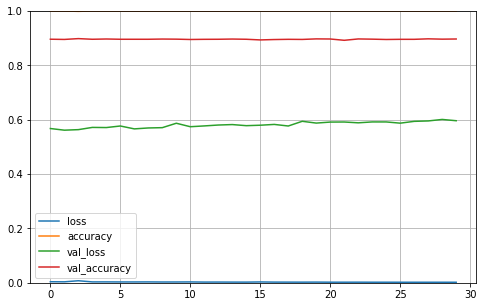

In [77]:
#Plotting the validation and training accuracies and losses
import pandas as pd
pd.DataFrame(model_history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()

In [78]:
#89% is the accuracy and the first value is the loss. 
#Testing set evaluation is done here
model.evaluate(X_test,y_test)

313/313 [==============================] - 0s 2ms/step - loss: 0.6704 - accuracy: 0.8920


[0.670410692691803, 0.8920000195503235]

In [0]:
X_new = X_test[:30]

In [89]:
#This better explains softmax meaning. Sum all the values in each row you will get 1. 
y_proba = model.predict (X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  ],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.32, 0.  , 0.  , 0.  , 0.  , 0.  , 0.68, 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.28, 0.  , 0.

In [83]:
y_pred = model.predict_classes(X_new)
y_pred

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9, 2, 1])

In [84]:
#np is numpy, and we have called what we had done earlier.. class names to find out which class the object belongs to 
np.array(class_names)[y_pred]

array(['Ankle Boot', 'Pull-Over', 'Trouser'], dtype='<U11')

In [0]:
#Representation of objects in our dataset.
print(plt.imshow(X_test[0]))

AxesImage(54,36;334.8x217.44)


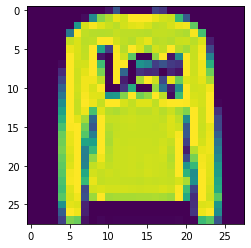

In [104]:
print(plt.imshow(X_test[1]))

AxesImage(54,36;334.8x217.44)


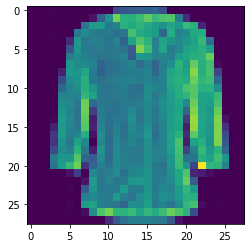

In [105]:
#See the differences in the probabilities. In the above image and this image the probability values are different and hence we come to the conclusion 
#that the above one is Pull over while this one is shirt
print(plt.imshow(X_test[4]))